Импортирование всех библиотек:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import numpy as np
import json
import time
from selenium import webdriver

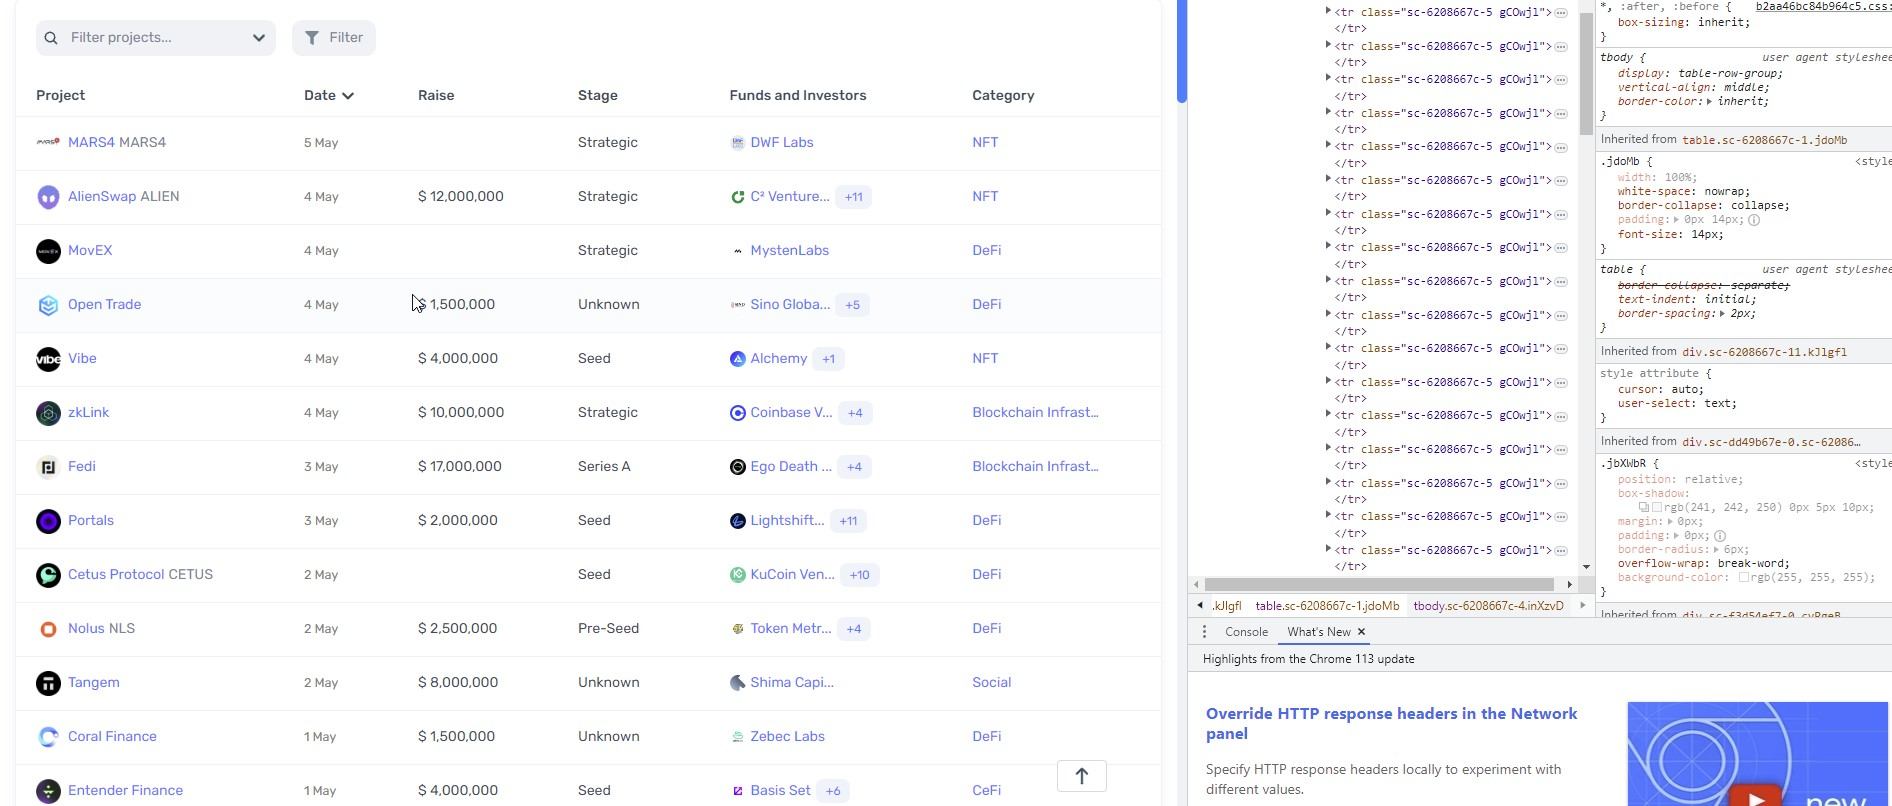

Первая попытка запарсить сайт, не получилсоь из-за того, что в тегах хранились совершенно другие данные. Информация различалась от того, что было на экране.

In [ ]:
url = 'https://cryptorank.io/funding-rounds?page=2'
page = requests.get(url)
site_text = page.content.decode('utf-8')
soup = BeautifulSoup(site_text)

In [ ]:
soup.find('tbody', class_ = 'sc-6208667c-4 inXzvD').find_all('tr', class_ = 'sc-6208667c-5 gCOwjl')[0].find_all('td', class_ = 'sc-6208667c-7 cIXQRl')[0].text

'13 Apr'

Эта таблица появлялась при загрузке основной страницы. Как можно видеть, тут есть информация о той дате, которую мы достали, но затем появляется совершенно другая таблица, что была изображена ранее. Информация из первой 5 секундной таблицы хранилась с совершенно другой таблице. Парсинг получился ещё сложнее

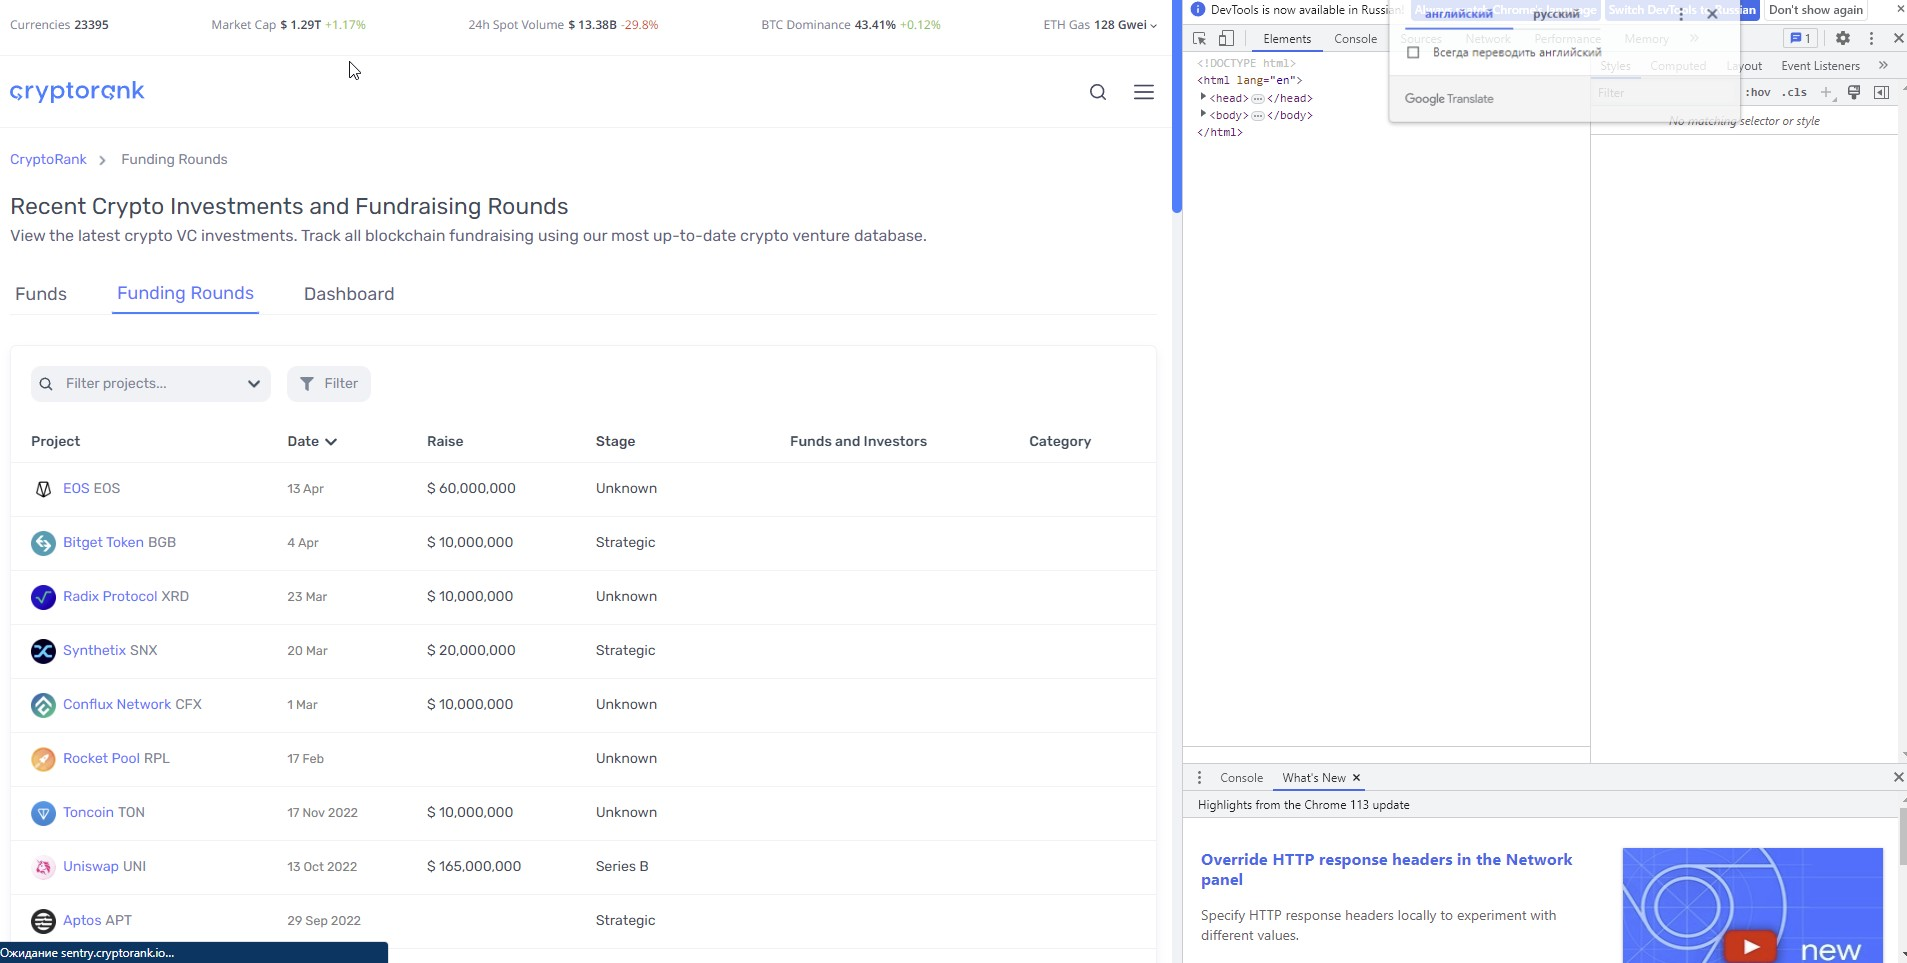

Тут у нас получилось достать информацию из первой 5 секундной таблицы, но она нас не интересует, так как хотим достать другие данные из актуальной таблицы на сайте

In [ ]:

vse_speski = soup.find('tbody', class_ = 'sc-6208667c-4 inXzvD').find_all('tr', class_ = 'sc-6208667c-5 gCOwjl')#.find_all('td', class_ = 'sc-6208667c-7 cIXQRl')[0].text
#sc-6208667c-4 inXzvD
data_list = list()
project_list = list()
money_list = list()
stage_list = list()
Funds_and_investors = list()
for elem in vse_speski:
    data = elem.find('span', class_ = 'sc-9a3fada0-15 forrif').text
    data_list.append(data)
    project = elem.find('span', class_ = 'sc-8602b743-0 hsvUmE').text
    project_list.append(project)
    money = elem.find('span', class_ = 'sc-6208667c-9 hCvxmW').text
    money_list.append(money)
    stage = elem.find_all('span', class_ = 'sc-6208667c-9 hCvxmW')[1].text
    stage_list.append(stage)
project_list

['EOS',
 'Bitget Token',
 'Radix Protocol',
 'Synthetix',
 'Conflux Network',
 'Rocket Pool',
 'Toncoin',
 'Uniswap',
 'Aptos',
 'Aptos',
 'Sui',
 'Injective',
 'Aptos',
 'KuCoin Token',
 'Polygon',
 'Flow',
 'KuCoin Token',
 'Klaytn ',
 'Axie Infinity',
 'Near Protocol',
 'Aptos',
 'Optimism',
 'ImmutableX',
 'Lido DAO Token',
 'Aptos',
 'Gemini Dollar',
 'Polygon',
 'The Graph',
 'Near Protocol',
 'Render Token',
 'The Sandbox',
 'Sui',
 'Gemini Dollar',
 'The Sandbox',
 'Axie Infinity',
 'Avalanche',
 'ImmutableX',
 'Arbitrum',
 'Frax',
 'Pax Dollar',
 'BitDAO',
 'Solana',
 'Polygon',
 'Cosmos',
 'Axie Infinity',
 'Lido DAO Token',
 'Pax Dollar',
 'Injective',
 'Toncoin',
 'Casper']

Далее попытались запарсить следующие столбцы, получилось только 4 столбца из 6, однако на выходе получаем снова данные, которые нас не интересуют.

In [ ]:
url = "https://cryptorank.io/funding-rounds?direction=asc"
res = requests.get(url)
soup = BeautifulSoup(res.content,'html.parser')
table = soup.find('table')

table_rows = table.find_all('tr')
data = []
for row in table_rows:
    td = row.find_all('td')
    row_data = [i.text for i in td]
    if row_data:  # проверяем, что список не пустой
        data.append(row_data)

headers = ['Company', 'Funding Type', 'Announced', 'Raised ($M)', 'Pre-Money Valuation ($M)', 'Lead Investor(s)']
df = pd.DataFrame(data, columns=headers)
print(df)


               Company Funding Type      Announced         Raised ($M)  \
0               EOSEOS       13 Apr   $ 60,000,000             Unknown   
1      Bitget TokenBGB        4 Apr   $ 10,000,000           Strategic   
2    Radix ProtocolXRD       23 Mar   $ 10,000,000             Unknown   
3         SynthetixSNX       20 Mar   $ 20,000,000           Strategic   
4   Conflux NetworkCFX        1 Mar   $ 10,000,000             Unknown   
5       Rocket PoolRPL       17 Feb                            Unknown   
6           ToncoinTON  17 Nov 2022   $ 10,000,000             Unknown   
7           UniswapUNI  13 Oct 2022  $ 165,000,000            Series B   
8             AptosAPT  29 Sep 2022                          Strategic   
9             AptosAPT  15 Sep 2022                          Strategic   
10              SuiSUI   8 Sep 2022  $ 300,000,000            Series B   
11        InjectiveINJ  10 Aug 2022   $ 40,000,000             Unknown   
12            AptosAPT  25 Jul 2022  $

Также были попытки использовать selenium, но они были безуспешны

In [ ]:
chrome_driver_path = 'C:/DRIVERS/chromedriver.exe'

driver = webdriver.Chrome(chrome_driver_path)

driver.get('https://cryptorank.io/funding-rounds')


time.sleep(5)


table = driver.find_element_by_css_selector('table')

rows = table.find_elements_by_css_selector('tr')

data = []
for row in rows:
    cells = row.find_elements_by_css_selector('td')
    row_data = [cell.text for cell in cells]
    if row_data:
        data.append(row_data)

df = pd.DataFrame(data, columns=['Company', 'Funding Type', 'Announced', 'Raised ($M)', 'Pre-Money Valuation ($M)', 'Lead Investor(s)'])

driver.quit()
print(df.head())


ModuleNotFoundError: ignored

В результате мы воспользовались ИИ CHAT-GPT, который конечно не сделал всю работу за нас, но подсказал в каком направлении двигаться. В прикрепленной тетрадке jupiter будет код и способ парсинга сайта https://cryptorank.io/funding-rounds. В результате у нас получилась следующая таблица:

**Данные, которые запарсили:**

In [ ]:
url = 'https://drive.google.com/uc?id=1x4Q_hnUtQWeb3OHVT3vKO-A7LJXyDIoQ'
df = pd.read_csv(url)
print(df.shape)
df

(3742, 6)


,Project,Date,Raise,Stage,Funds and investors,Category
0,NaN,NaN,NaN,NaN,NaN,NaN
1,DeSchool,31 Dec 2022,NaN,Seed,y2z Ventures +5,Blockchain Service
2,Magic Fantasy,30 Dec 2022,"$ 3,000,000",Unknown,Easycoins,GameFi
3,Twity,29 Dec 2022,"$ 6,500,000",Series A,Wave Capital,Social
4,wowTalkies,29 Dec 2022,NaN,Unknown,Tangentia Ventures,Social
...,...,...,...,...,...,...
3737,NaN,NaN,NaN,NaN,NaN,NaN
3738,Gensyn,1 Jan 2021,"$ 1,100,000",Pre-Seed,7percent Ventures +3,Blockchain Service
3739,Quantum Art,1 Jan 2021,"$ 1,000,000",Seed,NaN,NFT
3740,Salad Ventures,1 Jan 2021,"$ 2,000,000",Seed,Multicoin Capital,GameFi


# Информация о таблице: 

1) Project -  название проекта стартапа (f.e. биржи криптовалют, криптовалютные кошельки, ICO-платформы, майнинг-компании и др.)

2) Date - дата финансирования проекта (дата окончания раунда финансирования)

3) Raise - сумма финансирования (cумма, которую стартап собрал от инвесторов и/или венчурных фондов, $)

4) Stage - стадия развития стартапа (проекта), на которую приходится венчурное финансирование.

5) Category - отрасль, тематика проекта

6) Lead Investor - ведущий инвестор  (инвестор, который предоставляет наибольший объем финансирования,обычно он первый вкладывает деньги в стартап)

7) Investors quantity - количество инвесторов

# Обработка полученных данных


*   Уберем все пустые колонки **Done**
*   Заменим пропуски на NaN **Done**
*   Разделим столбец Funds and investors на Lead Investor и Investors quantity **Done**
*   Приведем столбец Investors quantity к типу float / int **Done**


In [ ]:
funding_rounds = df.dropna(how='all').replace('', np.nan)

funding_rounds[['Lead Investor', 'Investors quantity']] = funding_rounds['Funds and investors'].str.rsplit(' +', n=1, expand=True)
funding_rounds = funding_rounds.drop('Funds and investors', axis=1)

funding_rounds['Investors quantity'] = pd.to_numeric(funding_rounds['Investors quantity'], errors='coerce')

print(funding_rounds.shape)
funding_rounds.head()

(3704, 7)


,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,31 Dec 2022,NaN,Seed,Blockchain Service,y2z Ventures,5.0
2,Magic Fantasy,30 Dec 2022,"$ 3,000,000",Unknown,GameFi,Easycoins,NaN
3,Twity,29 Dec 2022,"$ 6,500,000",Series A,Social,Wave Capital,NaN
4,wowTalkies,29 Dec 2022,NaN,Unknown,Social,Tangentia Ventures,NaN
5,Argo Blockchain,28 Dec 2022,"$ 35,000,000",Debt Financing,Blockchain Service,Galaxy,NaN



*   Приведем столбец Raise к типу float, а столбец Date к типу даты.




In [ ]:
funding_rounds['Raise'] = funding_rounds['Raise'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True)
funding_rounds['Raise'] = funding_rounds['Raise'].astype(float)
funding_rounds['Date'] = pd.to_datetime(funding_rounds['Date'], format='%d %b %Y')

funding_rounds.head()

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,2022-12-31,NaN,Seed,Blockchain Service,y2z Ventures,5.0
2,Magic Fantasy,2022-12-30,3000000.0,Unknown,GameFi,Easycoins,NaN
3,Twity,2022-12-29,6500000.0,Series A,Social,Wave Capital,NaN
4,wowTalkies,2022-12-29,NaN,Unknown,Social,Tangentia Ventures,NaN
5,Argo Blockchain,2022-12-28,35000000.0,Debt Financing,Blockchain Service,Galaxy,NaN


### Есть пропущенные значения в колонках:


---

**Столбец 2** - raise (≈ 500 пропущенных)

**Столбец 5** - lead investor (≈ 200 пропущенных)


---

1) Если нет данных о рейзе, но есть инвесторы - выносим в отдельную таблицу - потом решаем, что с ними делать  **- 5 пункт**

2) Если нет данных об инвесторах, но есть данные о рейзе - ставим вместо NaN 'Private investor' + количество 1
/ либо тоже вынести  отдельно, а потом посмотрим, что там за данные и решим **- 4 пункт**

3) Если нет данных ни об инвесторах, ни о рейзе, (NaN в raise и lead investors) то ставим 0 и туда, и туда + в количество 0 **- 3 пункт**

---


**Столбец 6** - Investors quantity (900 пропущенных)


---

1) К Investors quantity добавить 1 (это неучтенный лид инвестор) ***- 1 пункт***

2) Где NaN: 
- где-то должна быть 1, если есть лид инвестор (≈ 700 пропущенных)  **- 2 пункт**
- где-то оставить NaN, если его нет (должно остаться ≈ 200 пропущенных) = их заполнить: либо 1, как Private Investor, если есть рейз ??? / либо 0, если нет рейза


---

**Столбец 4** - category (≈ 30 пропущенных)


---

30 пустых значений вынести отдельно и выставить им самим категории или понять, почему не подошли под другие **- 6 пункт**

In [ ]:
funding_rounds['Investors quantity'] = funding_rounds['Investors quantity'].add(1)
funding_rounds.loc[funding_rounds['Lead Investor'].notnull() & funding_rounds['Investors quantity'].isnull(), 'Investors quantity'] = 1

funding_rounds

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,2022-12-31,NaN,Seed,Blockchain Service,y2z Ventures,6.0
2,Magic Fantasy,2022-12-30,3000000.0,Unknown,GameFi,Easycoins,1.0
3,Twity,2022-12-29,6500000.0,Series A,Social,Wave Capital,1.0
4,wowTalkies,2022-12-29,NaN,Unknown,Social,Tangentia Ventures,1.0
5,Argo Blockchain,2022-12-28,35000000.0,Debt Financing,Blockchain Service,Galaxy,1.0
...,...,...,...,...,...,...,...
3736,Canza Finance,2021-01-01,100000.0,Pre-Seed,Blockchain Service,Flori Ventures,1.0
3738,Gensyn,2021-01-01,1100000.0,Pre-Seed,Blockchain Service,7percent Ventures,4.0
3739,Quantum Art,2021-01-01,1000000.0,Seed,NFT,NaN,NaN
3740,Salad Ventures,2021-01-01,2000000.0,Seed,GameFi,Multicoin Capital,1.0


In [ ]:
funding_rounds.loc[(funding_rounds['Lead Investor'].isna()) & (funding_rounds['Raise'].notna()), ['Lead Investor', 'Investors quantity']] = ['Private investor', 1]
funding_rounds.loc[(funding_rounds['Lead Investor'].isna()) & (funding_rounds['Raise'].isna()), ['Lead Investor', 'Investors quantity', 'Raise']] = ['No investors', 0, 0]

funding_rounds[169:197]

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
171,Layer N,2022-11-07,NaN,Strategic,Blockchain Infrastructure,Solana Ventures,5.0
172,Pyypl,2022-11-07,20000000.0,Series B,Blockchain Service,Global Ventures,1.0
173,Xternity,2022-11-07,4500000.0,Pre-Seed,Blockchain Service,NFX,4.0
174,Blockstars,2022-11-05,5000000.0,Unknown,GameFi,Play Ventures,6.0
175,CheeleeCHEEL,2022-11-04,9300000.0,Unknown,Social,Veligera Capital,3.0
176,Hitwicket,2022-11-04,3000000.0,Unknown,GameFi,Prime Venture Partners,1.0
177,MT TowerMT,2022-11-04,3000000.0,Seed,Blockchain Service,Private investor,1.0
178,Texture,2022-11-04,5000000.0,Unknown,DeFi,Sino Global Capital,5.0
179,Beosin,2022-11-03,20000000.0,Strategic,Blockchain Service,Private investor,1.0
180,Elusiv,2022-11-03,3500000.0,Seed,Blockchain Service,LongHash Ventures,18.0


In [ ]:
no_info_raise = funding_rounds.loc[funding_rounds['Raise'].isna()]
no_info_raise

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,2022-12-31,NaN,Seed,Blockchain Service,y2z Ventures,6.0
4,wowTalkies,2022-12-29,NaN,Unknown,Social,Tangentia Ventures,1.0
10,Wallchain,2022-12-27,NaN,Unknown,DeFi,Skyland Ventures,1.0
11,Dapps,2022-12-26,NaN,Pre-Seed,Blockchain Service,Ajeet Khurana,7.0
37,DressX,2022-12-15,NaN,Unknown,Blockchain Service,Warner Music Group,1.0
...,...,...,...,...,...,...,...
3703,Single EarthMERIT,2021-01-15,NaN,Pre-Seed,Blockchain Service,Icebreaker vc,2.0
3705,Gourmet GalaxyGUM,2021-01-14,NaN,Strategic,DeFi,Magnus Capital,1.0
3725,DAO MakerDAO,2021-01-07,NaN,Strategic,DeFi,Morningstar Ventures,20.0
3735,AgoricBLD,2021-01-01,NaN,Unknown,Blockchain Infrastructure,Bossanova Investimentos,1.0


In [ ]:
funding_rounds['Category'].value_counts()

Blockchain Service           1137
DeFi                          713
GameFi                        521
CeFi                          444
NFT                           368
Social                        240
Blockchain Infrastructure     237
Stablecoin                     14
Currency                        3
Tokenized Stock                 1
Name: Category, dtype: int64

In [ ]:
no_info_category = funding_rounds.loc[funding_rounds['Category'].isna()]
no_info_category

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
756,LF Labs,2022-07-13,NaN,Seed,NaN,Alliance DAO,1.0
782,META WORLDMETAD,2022-07-10,30000000.0,Unknown,NaN,Mai Vu Minh,1.0
1134,Seed ClubCLUB,2022-05-18,15000000.0,Private Token Sale,NaN,Multicoin Capital,15.0
1284,PeculiumPCL,2022-04-27,10550000.0,Unknown,NaN,The Global Emerging Markets Group (GEM),1.0
2004,CardashiftCLAP,2022-01-16,1500000.0,Private Token Sale,NaN,Private investor,1.0
2077,Aster Protocol,2022-01-03,1000000.0,Seed,NaN,MEXC,11.0
2227,Popop WorldPOP,2021-12-08,5750000.0,Seed,NaN,Maven Capital,15.0
2229,WhalemapWMP,2021-12-08,1600000.0,Unknown,NaN,Shima Capital,10.0
2230,Whydah,2021-12-08,25000000.0,Unknown,NaN,HashKey Capital,11.0
2380,SaddleSDL,2021-11-11,7500000.0,Series A,NaN,Polychain Capital,4.0


In [ ]:
missing_raise = funding_rounds[funding_rounds['Raise'].isna()] ##Смотрим, где неизвестен Raise

pd.options.display.float_format = '{:.2f}'.format ##Делаем так, чтобы выводилось только два знака после запятых

for index, row in missing_raise.iterrows():
  
    inv_qty = row['Investors quantity']  ##Определяем количество инвесторов в текущей строке

    # фильтруем таблицу, оставляя только известные Raise с таким же количеством инвесторов
    known_raise = funding_rounds[(funding_rounds['Raise'].notna()) & (funding_rounds['Investors quantity'] == inv_qty)]
    # если есть известные Raise, берем среднее значение, иначе пропуск (к слову, пропусков не будет)
    if not known_raise.empty:
        avg_raise = known_raise['Raise'].mean()
    else:
        avg_raise = np.nan  
    # заполняем пропуск средним значением
    funding_rounds.at[index, 'Raise'] = float(avg_raise)

funding_rounds

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
1,DeSchool,2022-12-31,34087699.60,Seed,Blockchain Service,y2z Ventures,6.00
2,Magic Fantasy,2022-12-30,3000000.00,Unknown,GameFi,Easycoins,1.00
3,Twity,2022-12-29,6500000.00,Series A,Social,Wave Capital,1.00
4,wowTalkies,2022-12-29,25362517.15,Unknown,Social,Tangentia Ventures,1.00
5,Argo Blockchain,2022-12-28,35000000.00,Debt Financing,Blockchain Service,Galaxy,1.00
...,...,...,...,...,...,...,...
3736,Canza Finance,2021-01-01,100000.00,Pre-Seed,Blockchain Service,Flori Ventures,1.00
3738,Gensyn,2021-01-01,1100000.00,Pre-Seed,Blockchain Service,7percent Ventures,4.00
3739,Quantum Art,2021-01-01,1000000.00,Seed,NFT,Private investor,1.00
3740,Salad Ventures,2021-01-01,2000000.00,Seed,GameFi,Multicoin Capital,1.00


In [ ]:
duplicates = funding_rounds[funding_rounds.duplicated(['Project'], keep=False)]
duplicates = funding_rounds.loc[df['Project'].isin(duplicates['Project'])]
duplicates.sort_values(by = 'Project')

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
3653,0x ProtocolZRX,2021-02-05,15000000.0,Series A,DeFi,Pantera Capital,7.0
1291,0x ProtocolZRX,2022-04-26,70000000.0,Series B,DeFi,Greylock Partners,10.0
2276,2TM,2021-11-30,50300000.0,Series B,Blockchain Service,Tribe Capital,5.0
3103,2TM,2021-06-01,200000000.0,Series B,Blockchain Service,SoftBank,1.0
2445,5ire5IRE,2021-10-28,21000000.0,Seed,Blockchain Infrastructure,GEM Digital,1.0
...,...,...,...,...,...,...,...
1748,tZERO,2022-02-22,NaN,Strategic,CeFi,Intercontinental Exchange,3.0
521,thirdweb,2022-08-25,24000000.0,Series A,Blockchain Service,Haun Ventures,7.0
2195,thirdweb,2021-12-13,5000000.0,Seed,Blockchain Service,Mark Cuban,2.0
3392,zCloak Network,2021-04-09,1300000.0,Seed,Blockchain Service,IOSG,7.0


**Заполнить пустые значения:**

а- 30 значений категорий. отсмотреть и собственноручно заполнить

б- 450 значений с инвесторами, но без рейза. тут можно наверное среднеее значение, но я бы брала среднее наверное не от общего, а среднее от таких-же по количеству инвесторов. или knn вообще можт подойти - тут пока не знаю, надо пробовать



### **Выбросы**

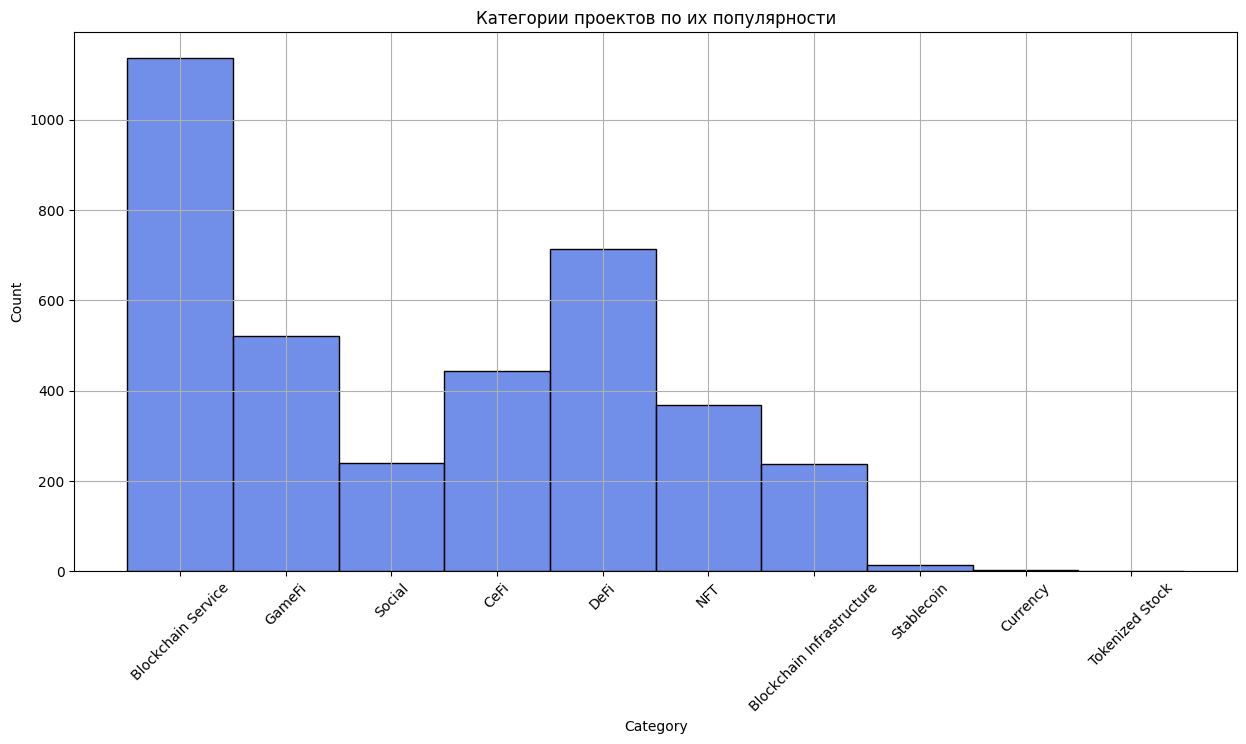

In [ ]:
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

plt.figure(figsize=(15, 7))
funding_rounds['Category'].value_counts()
sns.histplot(data = funding_rounds, x = 'Category', color = 'royalblue')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Категории проектов по их популярности')
plt.show()

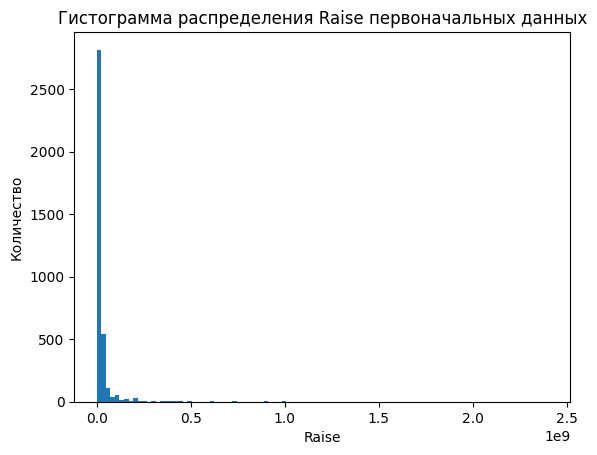

In [ ]:
plt.hist(funding_rounds['Raise'], bins=100)
plt.title('Гистограмма распределения Raise первоначальных данных')
plt.xlabel('Raise')
plt.ylabel('Количество')
plt.show()

Text(0, 0.5, 'Raise')

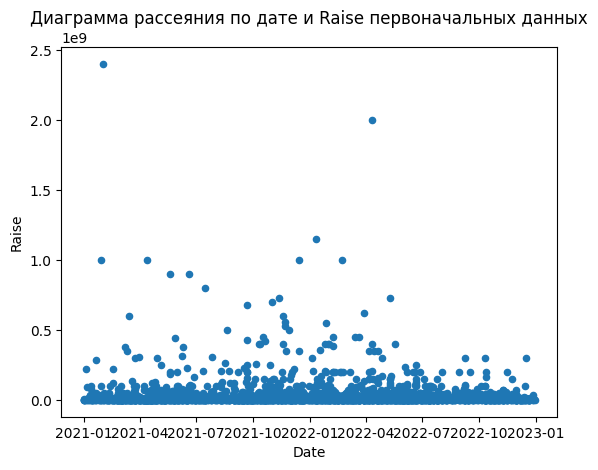

In [ ]:
funding_rounds.plot(kind='scatter', x='Date', y='Raise')
plt.title('Диаграмма рассеяния по дате и Raise первоначальных данных')
plt.xlabel('Date')
plt.ylabel('Raise')

In [ ]:
q_1 = funding_rounds['Raise'].quantile(0.25)
q_3 = funding_rounds['Raise'].quantile(0.75)
IQR = q_3 - q_1
low = q_1 - 1.5 * IQR
up = q_3 + 1.5 * IQR

funding_rounds_new = funding_rounds[(funding_rounds['Raise'] >= low) & (funding_rounds['Raise'] <= up)]
funding_rounds_new

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity
2,Magic Fantasy,2022-12-30,3000000.0,Unknown,GameFi,Easycoins,1.0
3,Twity,2022-12-29,6500000.0,Series A,Social,Wave Capital,1.0
6,Centbee,2022-12-28,1000000.0,Pre-Series A,CeFi,Calvin Ayre,1.0
7,Open World: The Lost Land,2022-12-28,2000000.0,Seed,GameFi,Private investor,1.0
8,Flappy MoonbirdFMB,2022-12-27,6000000.0,Series A,GameFi,LinkVC,1.0
...,...,...,...,...,...,...,...
3734,CUDOSCUDOS,2021-01-02,5000000.0,Unknown,DeFi,Private investor,1.0
3736,Canza Finance,2021-01-01,100000.0,Pre-Seed,Blockchain Service,Flori Ventures,1.0
3738,Gensyn,2021-01-01,1100000.0,Pre-Seed,Blockchain Service,7percent Ventures,4.0
3739,Quantum Art,2021-01-01,1000000.0,Seed,NFT,Private investor,1.0


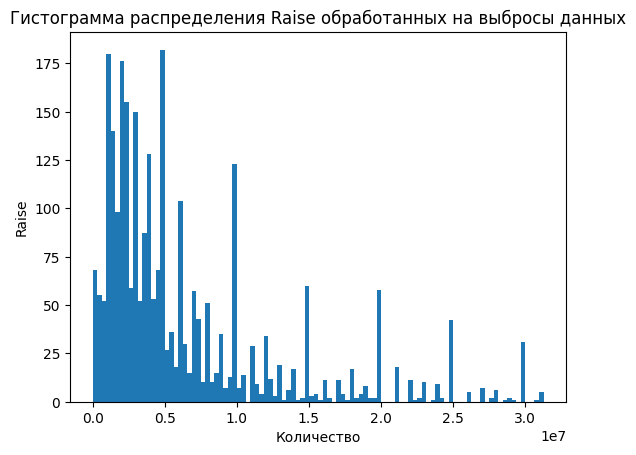

In [ ]:
plt.hist(funding_rounds_new['Raise'], bins=100)
plt.title('Гистограмма распределения Raise обработанных на выбросы данных')
plt.xlabel('Количество')
plt.ylabel('Raise')
plt.show()

Text(0, 0.5, 'Raise')

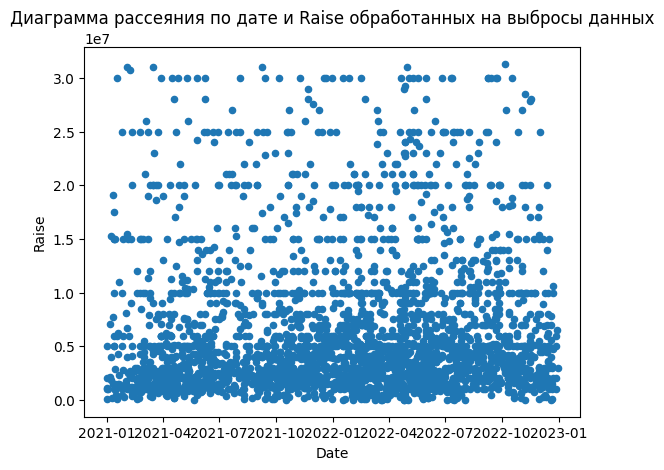

In [ ]:
funding_rounds_new.plot(kind='scatter', x='Date', y='Raise')
plt.title('Диаграмма рассеяния по дате и Raise обработанных на выбросы данных')
plt.xlabel('Date')
plt.ylabel('Raise')

In [ ]:
funding_rounds.shape

(3704, 7)

In [ ]:
funding_rounds_new.shape

(2802, 7)

In [ ]:
no_info_category_new = funding_rounds_new.loc[funding_rounds_new['Category'].isna()]
no_info_category_new.shape

(23, 7)

In [ ]:
no_info_raise_new = funding_rounds_new.loc[funding_rounds_new['Raise'].isna()]
no_info_raise_new.shape

(0, 7)

In [ ]:
funding_rounds['Investors quantity_new'] = funding_rounds.apply(lambda row: row['Investors quantity'] + 1 if pd.notnull(row['Investors quantity']) else 1 if pd.notnull(row['Lead Investor']) else row['Investors quantity'], axis=1)
funding_rounds


,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity,Investors quantity_new
1,DeSchool,2022-12-31,NaN,Seed,Blockchain Service,y2z Ventures,5.0,6.0
2,Magic Fantasy,2022-12-30,3000000.0,Unknown,GameFi,Easycoins,NaN,1.0
3,Twity,2022-12-29,6500000.0,Series A,Social,Wave Capital,NaN,1.0
4,wowTalkies,2022-12-29,NaN,Unknown,Social,Tangentia Ventures,NaN,1.0
5,Argo Blockchain,2022-12-28,35000000.0,Debt Financing,Blockchain Service,Galaxy,NaN,1.0
...,...,...,...,...,...,...,...,...
3736,Canza Finance,2021-01-01,100000.0,Pre-Seed,Blockchain Service,Flori Ventures,NaN,1.0
3738,Gensyn,2021-01-01,1100000.0,Pre-Seed,Blockchain Service,7percent Ventures,3.0,4.0
3739,Quantum Art,2021-01-01,1000000.0,Seed,NFT,NaN,NaN,NaN
3740,Salad Ventures,2021-01-01,2000000.0,Seed,GameFi,Multicoin Capital,NaN,1.0


In [ ]:
df_new = funding_rounds
mask = (funding_rounds['Raise'].isna()) & (funding_rounds['Lead Investor'] == '-') & (funding_rounds['Investors quantity_new'].isna())
df_new.loc[mask, ['Raise', 'Lead Investor', 'Investors quantity_new']] = [0, '-', 0]
filtered_data = df_new.loc[(df_new['Raise'].isna()) & (df_new['Lead Investor'] == '-') & (df_new['Investors quantity_new'].isna())]
filtered_data

,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity,Investors quantity_new


In [ ]:
check = funding_rounds[(funding_rounds['Lead Investor'].isnull()) & (~funding_rounds['Raise'].isnull())]
check[50:100]



,Project,Date,Raise,Stage,Category,Lead Investor,Investors quantity,Investors quantity_new
860,FTT DAO,2022-06-27,7000000.0,Unknown,Social,NaN,NaN,NaN
873,Eight XR,2022-06-23,820000.0,Pre-Seed,Blockchain Service,NaN,NaN,NaN
876,Authena,2022-06-22,1300000.0,Series A,Blockchain Service,NaN,NaN,NaN
879,Future FundGTFF,2022-06-22,3800000.0,Unknown,DeFi,NaN,NaN,NaN
928,Coinstash,2022-06-14,1400000.0,Seed,CeFi,NaN,NaN,NaN
1002,FYX GamingFYX,2022-06-06,1000000.0,Debt Financing,GameFi,NaN,NaN,NaN
1014,Foreman,2022-06-03,3000000.0,Series A,Blockchain Service,NaN,NaN,NaN
1015,NeoSwap,2022-06-03,202500.0,Unknown,NFT,NaN,NaN,NaN
1028,AutenticaAUT,2022-06-01,1200000.0,Pre-Seed,NFT,NaN,NaN,NaN
1030,Bulk Token Sender,2022-06-01,629000.0,Seed,Blockchain Service,NaN,NaN,NaN


In [ ]:
funding_rounds.loc[(funding_rounds['Lead Investor'].isna()) & (funding_rounds['Raise'].notna()), ['Lead Investor', 'Investors quantity_new']] = ['Private investor', 1]
check2 = funding_rounds.loc[funding_rounds['Lead Investor'] == 'Private investor', 'Lead Investor']
check2

7       Private investor
9       Private investor
18      Private investor
21      Private investor
52      Private investor
              ...       
3724    Private investor
3729    Private investor
3731    Private investor
3734    Private investor
3739    Private investor
Name: Lead Investor, Length: 198, dtype: object

Что касается блока "Машинное обучение", то тут седующие планы:


1.   В качестве переменной, которую будем предсказывать, выбрали колонку RAISE
2.   Так как в Raise находятся вещественные числа, будем обучать модель линейной регрессии
3.   Будем проводить скалирование и регуляризацию
4.   Скорее всего, разбиение выборки будет на трэйн и тетс в соотношении 70/30 или 80/20
5.   Для кодирования будем использова
6.   Для модели будем использовать следующие метрики: MSE, MAE, MAPE, HUBER_LOSS, MSLE и другие метрики
7.  Возможно добавления ещё одних данных, с уточнением по инвесторам (рыночная капитализация, торговый объём в 24 часа, коэффициент доминации на рынке). Далее будет проведена работа над признаками: использование полиномов, отбор на основе корреляции или дисперсии.

